# Lab 5 Data Assembly I

#### This session will cover:

1. Fetch data from external datasources 
2. Basic merging 


### 5.1. Let's load and install some libraries

In [1]:
!pip install py-openaq

In [2]:
import pandas as pd
import seaborn as sns

In [3]:
import openaq

In [4]:
import matplotlib as mpl
import matplotlib.pyplot as plt

### Let's make our first API call

In [5]:
api = openaq.OpenAQ()

status, resp = api.cities()

In [6]:
status

200

In [7]:
resp

{'meta': {'name': 'openaq-api',
  'license': 'CC BY 4.0d',
  'website': 'https://u50g7n0cbj.execute-api.us-east-1.amazonaws.com/',
  'page': 1,
  'limit': 100,
  'found': 2915,
  'pages': 30},
 'results': [{'country': 'US',
   'name': '007',
   'city': '007',
   'count': 1372,
   'locations': 5},
  {'country': 'US',
   'name': '019',
   'city': '019',
   'count': 704,
   'locations': 1},
  {'country': 'US',
   'name': '037',
   'city': '037',
   'count': 2683,
   'locations': 23},
  {'country': 'US',
   'name': '039',
   'city': '039',
   'count': 380,
   'locations': 1},
  {'country': 'US',
   'name': '047',
   'city': '047',
   'count': 101,
   'locations': 1},
  {'country': 'US',
   'name': '051',
   'city': '051',
   'count': 330,
   'locations': 7},
  {'country': 'US',
   'name': '077',
   'city': '077',
   'count': 670334,
   'locations': 1},
  {'country': 'CH',
   'name': 'Aargau',
   'city': 'Aargau',
   'count': 4054,
   'locations': 1},
  {'country': 'MX',
   'name': 'Abasolo

### Let's make our second API call
### This time we want the data in pandas format

In [8]:
cities = api.cities(df=True, limit=10000)


/srv/conda/envs/notebook/lib/python3.7/site-packages/openaq/decorators.py:57: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  data = pd.io.json.json_normalize(resp)


In [9]:
cities

,country,name,city,count,locations
0,US,007,007,1372.0,5
1,US,019,019,704.0,1
2,US,037,037,2683.0,23
3,US,039,039,380.0,1
4,US,047,047,101.0,1
...,...,...,...,...,...
2910,CN,黔东南苗族侗族自治州,黔东南苗族侗族自治州,371477083.0,2
2911,CN,黔南布依族苗族自治州,黔南布依族苗族自治州,371969570.0,2
2912,CN,黔西南布依族苗族自治州,黔西南布依族苗族自治州,368439999.0,2
2913,CN,齐齐哈尔市,齐齐哈尔市,916311169.0,6


In [10]:
cities.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2915 entries, 0 to 2914
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   country    2915 non-null   object 
 1   name       2915 non-null   object 
 2   city       2915 non-null   object 
 3   count      2915 non-null   float64
 4   locations  2915 non-null   int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 114.0+ KB


### Let's make our third API call

In [11]:
countries = api.countries(limit=10000, df=True)

print (countries.head())

  code         count  locations  cities                  name
0   AD  9.330103e+07          3       2               Andorra
1   AE  5.764753e+09          5       3  United Arab Emirates
2   AF  5.195612e+07          2       2           Afghanistan
3   AM  7.459801e+09          2       0               Armenia
4   AO  3.842638e+09          2       0                Angola


/srv/conda/envs/notebook/lib/python3.7/site-packages/openaq/decorators.py:57: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  data = pd.io.json.json_normalize(resp)


In [12]:
countries

,code,count,locations,cities,name
0,AD,9.330103e+07,3,2,Andorra
1,AE,5.764753e+09,5,3,United Arab Emirates
2,AF,5.195612e+07,2,2,Afghanistan
3,AM,7.459801e+09,2,0,Armenia
4,AO,3.842638e+09,2,0,Angola
...,...,...,...,...,...
125,UZ,6.694815e+07,1,1,Uzbekistan
126,VM,6.750976e+07,2,1,VM
127,VN,2.214469e+10,9,2,Vietnam
128,XK,4.838156e+09,16,8,Kosovo


#### Let's make our fourth API call

In [13]:
parameters = api.parameters(df=True)

parameters

/srv/conda/envs/notebook/lib/python3.7/site-packages/openaq/decorators.py:57: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  data = pd.io.json.json_normalize(resp)


,id,name,description,preferredUnit
0,1,pm10,Particulate matter less than 10 micrometers in...,µg/m³
1,2,pm25,Particulate matter less than 2.5 micrometers i...,µg/m³
2,3,o3,Ozone mass concentration,µg/m³
3,4,co,Carbon Monoxide mass concentration,µg/m³
4,5,no2,Nitrogen Dioxide mass concentration,µg/m³
5,6,so2,Sulfur Dioxide mass concentration,µg/m³
6,7,no2,Nitrogen Dioxide concentration,ppm
7,8,co,Carbon Monoxide concentration,ppm
8,9,so2,Sulfur Dioxide concentration,ppm
9,10,o3,Ozone concentration,ppm


### Let's make our fifth API call

In [14]:
locations = api.locations(df=True)

locations

/srv/conda/envs/notebook/lib/python3.7/site-packages/openaq/decorators.py:57: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  data = pd.io.json.json_normalize(resp)


,id,country,city,cities,location,locations,sourceName,sourceNames,sourceType,sourceTypes,firstUpdated,lastUpdated,parameters,countsByMeasurement,count,coordinates.latitude,coordinates.longitude
0,42400,RW,Kigali,[Kigali],KGL,[KGL],Rwanda REMA,[Rwanda REMA],government,[government],2020-12-28 22:45:00+00:00,2021-09-15 09:50:00+00:00,"[pm10, co, no2, pm25]","[{'parameter': 'pm10', 'count': 76983}, {'para...",307815,-1.955597,30.057738
1,5616,IN,Noida,[Noida],"Sector - 62, Noida - IMD","[Sector - 62, Noida - IMD, Sector - 62, Noida,...",caaqm,"[caaqm, data.gov.in]",government,[government],2018-03-09 05:30:00+00:00,2021-09-15 09:45:00+00:00,"[co, pm10, o3, pm25, no2]","[{'parameter': 'co', 'count': 118382}, {'param...",591345,28.624548,77.357710
2,5627,IN,Delhi,[Delhi],"CRRI Mathura Road, Delhi - IMD","[CRRI Mathura Road, Delhi - IMD, CRRI Mathura ...",caaqm,"[caaqm, data.gov.in]",government,[government],2018-03-09 05:30:00+00:00,2021-09-15 09:45:00+00:00,"[no2, pm10, o3, pm25, co]","[{'parameter': 'no2', 'count': 116699}, {'para...",583366,28.551201,77.273574
3,5634,IN,Delhi,[Delhi],"Lodhi Road, Delhi - IMD","[Lodhi Road, Delhi - IMD, Lodhi Road, New Delh...",caaqm,"[caaqm, data.gov.in]",government,[government],2018-03-09 05:30:00+00:00,2021-09-15 09:45:00+00:00,"[no2, pm25, pm10, o3, co]","[{'parameter': 'no2', 'count': 100546}, {'para...",502317,28.591825,77.227307
4,6356,IN,Delhi,[Delhi],"Pusa, Delhi - IMD","[Pusa, Delhi - DPCC, Pusa, Delhi - IMD, Pusa, ...",caaqm,[caaqm],government,[government],2018-08-10 06:15:00+00:00,2021-09-15 09:45:00+00:00,"[o3, pm10, so2, co, pm25, no2]","[{'parameter': 'o3', 'count': 104771}, {'param...",540327,28.639645,77.146263
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,398,AU,Sydney South-west,[Sydney South-west],Camden,[Camden],Australia - New South Wales,[Australia - New South Wales],government,[government],2016-04-09 20:00:00+00:00,2021-09-15 09:00:00+00:00,"[no2, co, so2, o3, pm10, pm25]","[{'parameter': 'no2', 'count': 78660}, {'param...",336519,-34.041667,150.690278
96,406,GB,Oldbury,[Oldbury],Oldbury Birmingham Road,[Oldbury Birmingham Road],DEFRA,[DEFRA],government,[government],2016-02-27 20:00:00+00:00,2021-09-15 09:00:00+00:00,[no2],"[{'parameter': 'no2', 'count': 77821}]",77821,52.502436,-2.003497
97,414,GB,Stockton-on-Tees,[Stockton-on-Tees],Stockton-on-Tees Eaglescliffe,[Stockton-on-Tees Eaglescliffe],DEFRA,[DEFRA],government,[government],2016-02-27 21:00:00+00:00,2021-09-15 09:00:00+00:00,"[pm25, pm10, no2]","[{'parameter': 'pm25', 'count': 92244}, {'para...",273389,54.516667,-1.358547
98,417,AU,Sydney East,[Sydney East],Rozelle,[Rozelle],Australia - New South Wales,[Australia - New South Wales],government,[government],2016-02-16 01:00:00+00:00,2021-09-15 09:00:00+00:00,"[o3, co, pm10, so2, pm25, no2]","[{'parameter': 'o3', 'count': 77313}, {'parame...",400008,-33.865833,151.162500


### Let's make our sixth API call

In [15]:
London = api.measurements(city='London', limit=10000, df=True)

/srv/conda/envs/notebook/lib/python3.7/site-packages/openaq/decorators.py:57: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  data = pd.io.json.json_normalize(resp)


In [16]:
London

,location,parameter,value,unit,country,city,date.utc,coordinates.latitude,coordinates.longitude
date.local,,,,,,,,,
2021-09-15 10:00:00,Southend-on-Sea,pm25,17.0,b'\xc2\xb5g/m\xc2\xb3',GB,London,2021-09-15 09:00:00+00:00,51.544206,0.678408
2021-09-15 10:00:00,Thurrock,so2,2.0,b'\xc2\xb5g/m\xc2\xb3',GB,London,2021-09-15 09:00:00+00:00,51.477070,0.317969
2021-09-15 10:00:00,London Hillingdon,no2,17.0,b'\xc2\xb5g/m\xc2\xb3',GB,London,2021-09-15 09:00:00+00:00,51.496330,-0.460861
2021-09-15 10:00:00,Southwark A2 Old Kent Road,pm10,25.0,b'\xc2\xb5g/m\xc2\xb3',GB,London,2021-09-15 09:00:00+00:00,51.480499,-0.059550
2021-09-15 10:00:00,London Bexley,so2,7.5,b'\xc2\xb5g/m\xc2\xb3',GB,London,2021-09-15 09:00:00+00:00,51.466030,0.184806
...,...,...,...,...,...,...,...,...,...
2021-09-04 04:00:00,London N. Kensington,so2,1.0,b'\xc2\xb5g/m\xc2\xb3',GB,London,2021-09-04 03:00:00+00:00,51.521050,-0.213492
2021-09-04 04:00:00,Tower Hamlets Roadside,no2,15.0,b'\xc2\xb5g/m\xc2\xb3',GB,London,2021-09-04 03:00:00+00:00,51.522530,-0.042155
2021-09-04 04:00:00,London Harlington,o3,60.0,b'\xc2\xb5g/m\xc2\xb3',GB,London,2021-09-04 03:00:00+00:00,51.488790,-0.441614


### 5.2 Let's fetch some data from some cities
#### Berlin,  London, New Delhi, Beijing, Mexico DC

### How do we find Mexico DC ?

In [17]:
pd.set_option('display.max_rows', 100)
cities[cities['country']=='MX']

,country,name,city,count,locations
8,MX,Abasolo,Abasolo,3.242294e+07,2
27,MX,Aguascalientes,Aguascalientes,2.542000e+03,1
67,MX,Álvaro Obregón,Álvaro Obregón,1.437347e+08,1
101,MX,Apizaco,Apizaco,1.996254e+08,1
102,MX,Apodaca,Apodaca,1.133514e+08,1
135,MX,Atitalaquia,Atitalaquia,2.024622e+08,1
145,MX,Atotonilco de Tula,Atotonilco de Tula,1.982747e+08,1
163,MX,Azcapotzalco,Azcapotzalco,1.930132e+08,1
164,MX,Azteca,Azteca,1.921852e+08,1
176,MX,BAJA CALIFORNIA NORTE,BAJA CALIFORNIA NORTE,1.492219e+08,2


### Let's gather data from Distrito Federal (Mexico DC)

In [18]:
MexicoDC = api.measurements(city='DISTRITO FEDERAL', limit=100, df=True)

/srv/conda/envs/notebook/lib/python3.7/site-packages/openaq/decorators.py:57: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  data = pd.io.json.json_normalize(resp)


In [19]:
MexicoDC.head()

,location,parameter,value,unit,country,city,date.utc,coordinates.latitude,coordinates.longitude
date.local,,,,,,,,,
2021-09-15 03:00:00,Cuajimalpa,no2,0.016,ppm,MX,DISTRITO FEDERAL,2021-09-15 08:00:00+00:00,19.3653,-99.2917
2021-09-15 03:00:00,Cuajimalpa,so2,0.001,ppm,MX,DISTRITO FEDERAL,2021-09-15 08:00:00+00:00,19.3653,-99.2917
2021-09-15 03:00:00,Santiago Acahualtepe,no2,0.008,ppm,MX,DISTRITO FEDERAL,2021-09-15 08:00:00+00:00,19.3502,-99.1571
2021-09-15 03:00:00,Camarones,pm25,22.000,b'\xc2\xb5g/m\xc2\xb3',MX,DISTRITO FEDERAL,2021-09-15 08:00:00+00:00,19.4684,-99.1697
2021-09-15 03:00:00,Cuajimalpa,o3,0.001,ppm,MX,DISTRITO FEDERAL,2021-09-15 08:00:00+00:00,19.3653,-99.2917


### Let's gather data from Berlin (the german city not the one in the US)

In [20]:
Berlin = api.measurements(city='Berlin',country='DE', limit=100, df=True)

/srv/conda/envs/notebook/lib/python3.7/site-packages/openaq/decorators.py:57: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  data = pd.io.json.json_normalize(resp)


In [21]:
Berlin.head()

,location,parameter,value,unit,country,city,date.utc,coordinates.latitude,coordinates.longitude
date.local,,,,,,,,,
2021-09-15 04:00:00,DEBE069,no2,10.59,b'\xc2\xb5g/m\xc2\xb3',DE,Berlin,2021-09-15 02:00:00+00:00,52.438115,13.387720
2021-09-15 04:00:00,DEBE034,no2,8.08,b'\xc2\xb5g/m\xc2\xb3',DE,Berlin,2021-09-15 02:00:00+00:00,52.489451,13.430844
2021-09-15 04:00:00,DEBE063,no2,11.30,b'\xc2\xb5g/m\xc2\xb3',DE,Berlin,2021-09-15 02:00:00+00:00,52.467534,13.441654
2021-09-15 04:00:00,DEBE056,pm10,18.58,b'\xc2\xb5g/m\xc2\xb3',DE,Berlin,2021-09-15 02:00:00+00:00,52.447697,13.647050
2021-09-15 04:00:00,DEBE068,pm10,22.43,b'\xc2\xb5g/m\xc2\xb3',DE,Berlin,2021-09-15 02:00:00+00:00,52.513606,13.418833


### Let's gather data from London

In [22]:
London = api.measurements(city='London', limit=100, df=True)

/srv/conda/envs/notebook/lib/python3.7/site-packages/openaq/decorators.py:57: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  data = pd.io.json.json_normalize(resp)


### Let's gather data from New Delhi

### How do we find New Delhi ??

In [23]:
pd.options.display.max_rows=300
cities[cities['country']=='IN']

,country,name,city,count,locations
24,IN,Agartala,Agartala,2.454726e+07,1
25,IN,Agra,Agra,2.151278e+07,1
28,IN,Ahmedabad,Ahmedabad,4.499456e+07,3
37,IN,Aizawl,Aizawl,2.644645e+07,1
38,IN,Ajmer,Ajmer,4.706689e+07,4
68,IN,Alwar,Alwar,4.471504e+07,2
71,IN,Amaravati,Amaravati,4.853796e+07,2
74,IN,Ambala,Ambala,2.871505e+07,1
79,IN,Amritsar,Amritsar,7.733664e+07,2
94,IN,Ankleshwar,Ankleshwar,3.050381e+07,1


In [24]:


NewDelhi = api.measurements(city='Delhi', limit=100, df=True)

/srv/conda/envs/notebook/lib/python3.7/site-packages/openaq/decorators.py:57: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  data = pd.io.json.json_normalize(resp)


In [25]:
NewDelhi.head()

,location,parameter,value,unit,country,city,date.utc,coordinates.latitude,coordinates.longitude
date.local,,,,,,,,,
2021-09-15 15:15:00,"Pusa, Delhi - IMD",o3,27.76,b'\xc2\xb5g/m\xc2\xb3',IN,Delhi,2021-09-15 09:45:00+00:00,28.639645,77.146263
2021-09-15 15:15:00,"CRRI Mathura Road, Delhi - IMD",no2,11.43,b'\xc2\xb5g/m\xc2\xb3',IN,Delhi,2021-09-15 09:45:00+00:00,28.551201,77.273574
2021-09-15 15:15:00,"Pusa, Delhi - IMD",pm10,64.89,b'\xc2\xb5g/m\xc2\xb3',IN,Delhi,2021-09-15 09:45:00+00:00,28.639645,77.146263
2021-09-15 15:15:00,"Pusa, Delhi - IMD",co,1040.00,b'\xc2\xb5g/m\xc2\xb3',IN,Delhi,2021-09-15 09:45:00+00:00,28.639645,77.146263
2021-09-15 15:15:00,"Lodhi Road, Delhi - IMD",pm25,22.76,b'\xc2\xb5g/m\xc2\xb3',IN,Delhi,2021-09-15 09:45:00+00:00,28.591825,77.227307


### Let's gather data from Beijing

In [26]:
Beijing = api.measurements(city='Beijing', limit=100, df=True)

/srv/conda/envs/notebook/lib/python3.7/site-packages/openaq/decorators.py:57: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  data = pd.io.json.json_normalize(resp)


In [27]:
Beijing.head()

,location,parameter,value,unit,country,city,date.utc,coordinates.latitude,coordinates.longitude
date.local,,,,,,,,,
2021-09-15 17:00:00,Beijing US Embassy,pm25,18,b'\xc2\xb5g/m\xc2\xb3',CN,Beijing,2021-09-15 09:00:00+00:00,39.95,116.47
2021-09-15 16:00:00,Beijing US Embassy,pm25,15,b'\xc2\xb5g/m\xc2\xb3',CN,Beijing,2021-09-15 08:00:00+00:00,39.95,116.47
2021-09-15 15:00:00,Beijing US Embassy,pm25,14,b'\xc2\xb5g/m\xc2\xb3',CN,Beijing,2021-09-15 07:00:00+00:00,39.95,116.47
2021-09-15 14:00:00,Beijing US Embassy,pm25,15,b'\xc2\xb5g/m\xc2\xb3',CN,Beijing,2021-09-15 06:00:00+00:00,39.95,116.47
2021-09-15 13:00:00,Beijing US Embassy,pm25,17,b'\xc2\xb5g/m\xc2\xb3',CN,Beijing,2021-09-15 05:00:00+00:00,39.95,116.47


### 5.3. Concatenation

### the following figure provides a visual representation of the operation we want to perform
<img src="https://pandas.pydata.org/pandas-docs/stable/_images/08_concat_row.svg">



### Check the documentation for the concat command

https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.concat.html

### We want to combine the measurements of all the cities into a single dataframe

In [28]:
AirQualityCities = pd.concat([Beijing,Berlin,London,MexicoDC,NewDelhi], axis=0)

In [29]:
AirQualityCities

,location,parameter,value,unit,country,city,date.utc,coordinates.latitude,coordinates.longitude
date.local,,,,,,,,,
2021-09-15 17:00:00,Beijing US Embassy,pm25,18.00,b'\xc2\xb5g/m\xc2\xb3',CN,Beijing,2021-09-15 09:00:00+00:00,39.950000,116.470000
2021-09-15 16:00:00,Beijing US Embassy,pm25,15.00,b'\xc2\xb5g/m\xc2\xb3',CN,Beijing,2021-09-15 08:00:00+00:00,39.950000,116.470000
2021-09-15 15:00:00,Beijing US Embassy,pm25,14.00,b'\xc2\xb5g/m\xc2\xb3',CN,Beijing,2021-09-15 07:00:00+00:00,39.950000,116.470000
2021-09-15 14:00:00,Beijing US Embassy,pm25,15.00,b'\xc2\xb5g/m\xc2\xb3',CN,Beijing,2021-09-15 06:00:00+00:00,39.950000,116.470000
2021-09-15 13:00:00,Beijing US Embassy,pm25,17.00,b'\xc2\xb5g/m\xc2\xb3',CN,Beijing,2021-09-15 05:00:00+00:00,39.950000,116.470000
...,...,...,...,...,...,...,...,...,...
2021-09-15 14:15:00,"ITO, Delhi - CPCB",pm25,31.00,b'\xc2\xb5g/m\xc2\xb3',IN,Delhi,2021-09-15 08:45:00+00:00,28.628624,77.241060
2021-09-15 14:15:00,"ITO, Delhi - CPCB",no2,23.70,b'\xc2\xb5g/m\xc2\xb3',IN,Delhi,2021-09-15 08:45:00+00:00,28.628624,77.241060
2021-09-15 14:15:00,"ITO, Delhi - CPCB",so2,4.90,b'\xc2\xb5g/m\xc2\xb3',IN,Delhi,2021-09-15 08:45:00+00:00,28.628624,77.241060


### Question: How are cities doing in terms of CO pollution ??

In [30]:
AirQualityCitiesCO=AirQualityCities[AirQualityCities['parameter']=='co']

In [31]:
AirQualityCitiesCO.sample(10)

,location,parameter,value,unit,country,city,date.utc,coordinates.latitude,coordinates.longitude
date.local,,,,,,,,,
2021-09-15 04:00:00,DEBE065,co,260.0,b'\xc2\xb5g/m\xc2\xb3',DE,Berlin,2021-09-15 02:00:00+00:00,52.514072,13.469931
2021-09-15 03:00:00,Camarones,co,0.8,ppm,MX,DISTRITO FEDERAL,2021-09-15 08:00:00+00:00,19.468400,-99.169700
2021-09-15 15:00:00,"NSIT Dwarka, Delhi - CPCB",co,2020.0,b'\xc2\xb5g/m\xc2\xb3',IN,Delhi,2021-09-15 09:30:00+00:00,28.609090,77.032541
2021-09-15 14:45:00,"CRRI Mathura Road, Delhi - IMD",co,2600.0,b'\xc2\xb5g/m\xc2\xb3',IN,Delhi,2021-09-15 09:15:00+00:00,28.551201,77.273574
2021-09-15 03:00:00,Cuajimalpa,co,0.5,ppm,MX,DISTRITO FEDERAL,2021-09-15 08:00:00+00:00,19.365300,-99.291700
2021-09-15 02:00:00,Cuajimalpa,co,0.4,ppm,MX,DISTRITO FEDERAL,2021-09-15 07:00:00+00:00,19.365300,-99.291700
2021-09-15 03:00:00,Santiago Acahualtepe,co,0.1,ppm,MX,DISTRITO FEDERAL,2021-09-15 08:00:00+00:00,19.350200,-99.157100
2021-09-15 03:00:00,Tlahuac,co,0.5,ppm,MX,DISTRITO FEDERAL,2021-09-15 08:00:00+00:00,19.246400,-99.010000
2021-09-15 02:00:00,Tlahuac,co,0.5,ppm,MX,DISTRITO FEDERAL,2021-09-15 07:00:00+00:00,19.246400,-99.010000


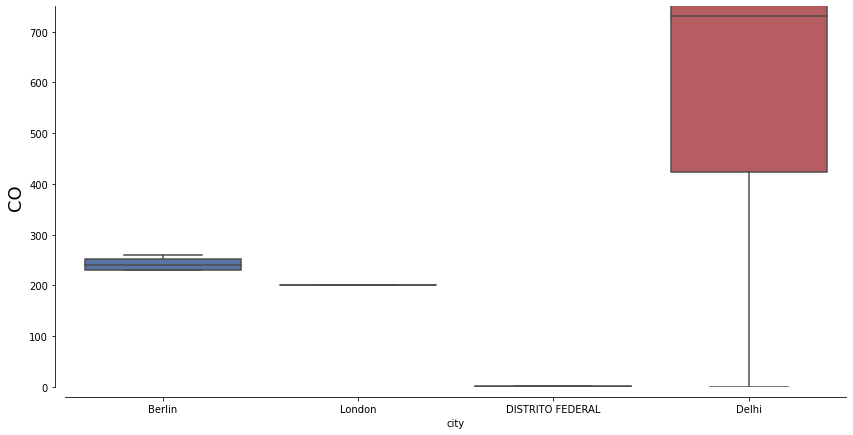

In [32]:
fig, ax = plt.subplots(1, figsize=(14,7))

ax = sns.boxplot(
    x='city',
    y='value',
    data=AirQualityCitiesCO,
    fliersize=0,
    palette='deep',
    ax=ax)

ax.set_ylim([0, 750])
ax.set_ylabel("CO", fontsize=18)
ax.set_xlabel("city")

sns.despine(offset=10)


plt.show()

### Question: How are cities doing in terms of PM25 pollution ??

In [33]:
AirQualityCitiesPM25=AirQualityCities[AirQualityCities['parameter']=='pm25']

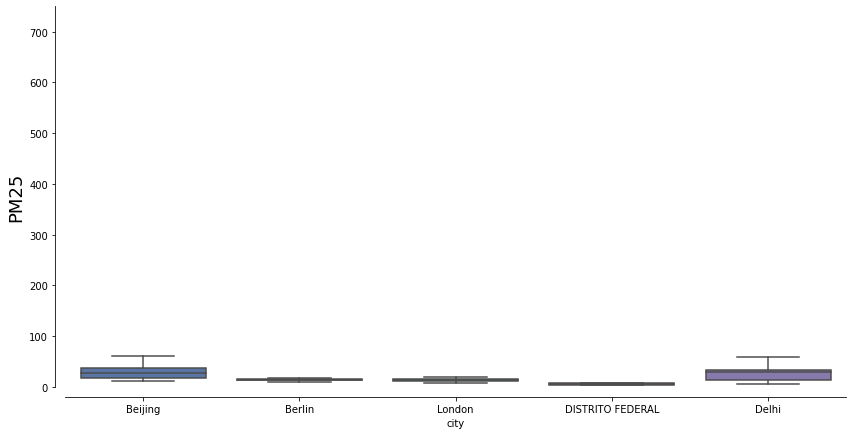

In [34]:
fig, ax = plt.subplots(1, figsize=(14,7))

ax = sns.boxplot(
    x='city',
    y='value',
    data=AirQualityCitiesPM25,
    fliersize=0,
    palette='deep',
    ax=ax)

ax.set_ylim([0, 750])
ax.set_ylabel("PM25", fontsize=18)
ax.set_xlabel("city")

sns.despine(offset=10)


plt.show()

### Question: How are cities doing in terms of PM10 pollution ??

In [35]:
AirQualityCitiesPM10=AirQualityCities[AirQualityCities['parameter']=='pm10']

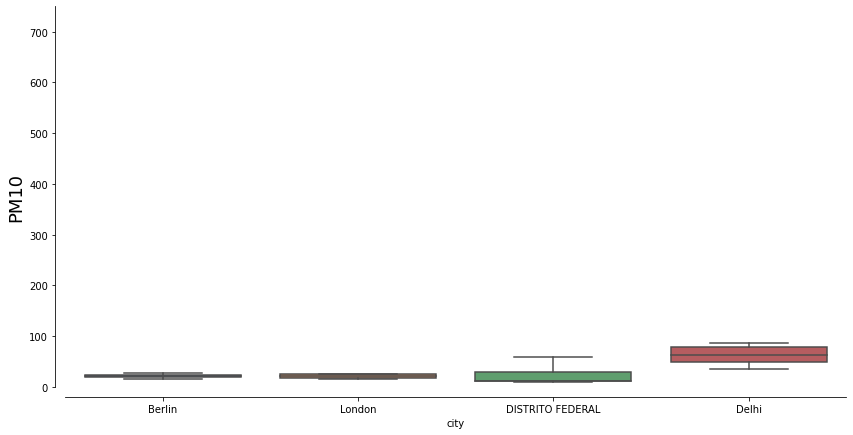

In [36]:
fig, ax = plt.subplots(1, figsize=(14,7))

ax = sns.boxplot(
    x='city',
    y='value',
    data=AirQualityCitiesPM10,
    fliersize=0,
    palette='deep',
    ax=ax)

ax.set_ylim([0, 750])
ax.set_ylabel("PM10", fontsize=18)
ax.set_xlabel("city")

sns.despine(offset=10)


plt.show()

# Further References:

#### Chapters 4 and 5 from the reference book: Pandas for Everyone. Available online at Exeter Library

